# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [0]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
# from api_keys import api_key
# See below, config file will not run in GitHub, it runs on my local machine 

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# PipInstalled Citipy  
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
api_key = "24409d883ea7f37184ab32d8418c7c15"
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("*********************************************")
print("Fetching Weather Data     ")
print("*********************************************")

# Record counters for loop 
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON, get data 
        city_weather = requests.get(city_url).json()

        # Identify and parse variables we want to extract 
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append city data into city data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # Note if error occurrs and weather data cannot be found
    except:
        print(f"Weather data for {city} not found.")
        pass
              
# Note end of data loading
print("*********************************************")
print("End of results")
print("*********************************************")

*********************************************
Fetching Weather Data     
*********************************************
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | cayenne
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | warwick
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | neiafu
Processing Record 9 of Set 1 | san andres
Processing Record 10 of Set 1 | korla
Processing Record 11 of Set 1 | sargatskoye
Processing Record 12 of Set 1 | libertador general san martin
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | coquimbo
Processing Record 15 of Set 1 | blensong
Weather data for blensong not found.
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | santiago del estero
Processing Record 20 of Set 1 | saanen
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [0]:
weather_data_pd = pd.DataFrame(city_data)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


In [27]:
weather_data_pd=weather_data_pd[["City", "Country","Lat","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
weather_data_pd.head()

,City,Country,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,bilibino,RU,68.05,0.28,88,90,0.83
1,hobart,AU,-42.88,57.20,67,90,10.29
2,thompson,CA,55.74,21.20,37,40,2.24
3,cayenne,GF,4.93,75.20,100,75,8.57
4,busselton,AU,-33.65,64.00,75,58,14.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

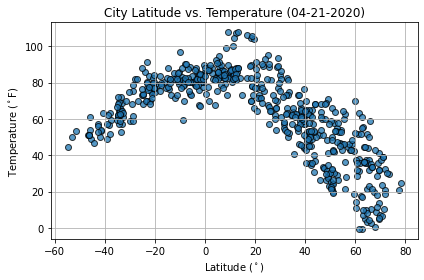

In [32]:
!pip install datetime 

from datetime import datetime

date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_data_pd["Lat"], weather_data_pd["Max Temp"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

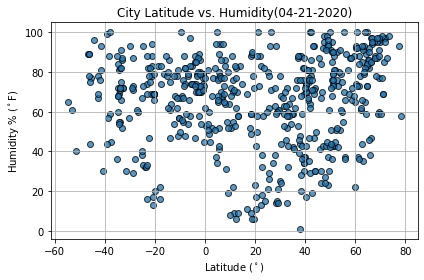

In [36]:
from datetime import datetime

date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_data_pd["Lat"], weather_data_pd["Humidity"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity % ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

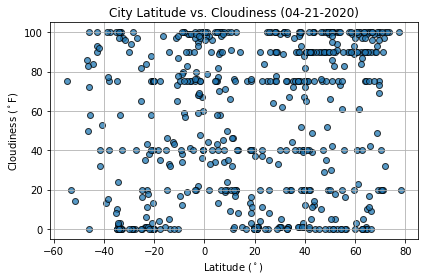

In [34]:
from datetime import datetime

date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_data_pd["Lat"], weather_data_pd["Cloudiness"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

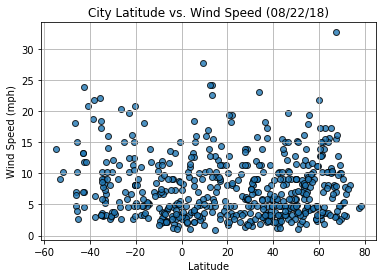

In [0]:
from datetime import datetime

date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_data_pd["Lat"], weather_data_pd["Max Temp"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("fig4.png")
plt.show()

# New Section
3 trends from the data: 


1.   Latitude vs. Temperature clearly illustrates how the temperature increases as one approaches the equator, and decreases as one moves away from the equator. 
2.   Latitude and Wind Speed as well as Latitude and Cloudiness appear to be less correlated than the other factors. 
3.   Latitude and Humidity follow a similar curve as Latitude and temperature, but more scattered. 

